<a href="https://colab.research.google.com/github/mahshooq-karayil/data-science/blob/main/customer_conversion_prediction/customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
!git clone https://github.com/mahshooq-karayil/data-science.git

Cloning into 'data-science'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 64 (delta 23), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (64/64), 324.55 KiB | 1.94 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
df=pd.read_csv('/content/data-science/customer_conversion_prediction/data.csv')

In [14]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [8]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [18]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [17]:
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [19]:
df.drop_duplicates(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


#**Age**

In [24]:
df.age.isnull().sum()

0

In [25]:
df.age.nunique()

77

In [29]:
df.age.value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [30]:
df.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

#**Job**

In [32]:
df.job.describe()

count           45205
unique             12
top       blue-collar
freq             9730
Name: job, dtype: object

In [39]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [34]:
df.job.nunique()

12

In [36]:
df.job.isnull().sum()

0

In [43]:
df.job.replace('unknown','blue-collar',inplace=True)

In [45]:
df.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

#**Marital Status**

In [53]:
df.marital.value_counts(normalize = True)

married     0.601925
single      0.282889
divorced    0.115186
Name: marital, dtype: float64

In [50]:
df.marital.nunique()

3

In [52]:
df.marital.isnull().sum()

0

#**Educational Qual**

In [56]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [66]:
df.education_qual.replace('unknown',df.education_qual.mode()[0],inplace=True)

In [67]:
df.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [57]:
df.education_qual.isnull().sum()

0

#**Call Type**

In [70]:
df.call_type.value_counts(normalize=True)

cellular     0.647760
unknown      0.287955
telephone    0.064285
Name: call_type, dtype: float64

In [74]:
df.call_type.isnull().sum()

0

0

#**Day**

In [71]:
df.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [72]:
df.day.isnull().sum()

0

#**Month**

In [75]:
df.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [76]:
df.mon.isnull().sum()

0

#**Duration**

In [77]:
df.dur.value_counts()

124     187
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [78]:
df.dur.isnull().sum()

0

In [80]:
df[df['dur']==0]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6424,53,management,married,primary,unknown,27,may,0,4,unknown,no
22937,35,technician,married,secondary,cellular,26,aug,0,15,unknown,no
36425,31,entrepreneur,married,secondary,cellular,11,may,0,2,unknown,no


In [81]:
df.dur.nunique()

1573

#**Number of calls**

In [82]:
df.num_calls.value_counts()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [83]:
df.num_calls.nunique()

48

In [84]:
df.num_calls.isnull().sum()

0

#**Previous Outcome**

In [86]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [94]:
df[df['num_calls']==1].prev_outcome.shape[0]

17542

In [92]:
df[df['num_calls']==1].prev_outcome.value_counts()

unknown    13529
failure     2458
success      837
other        718
Name: prev_outcome, dtype: int64

In [95]:
df[df['num_calls']>1].prev_outcome.value_counts()

unknown    23424
failure     2443
other       1122
success      674
Name: prev_outcome, dtype: int64

#**y : Target**

In [98]:
df.y.value_counts(normalize=True)

no     0.883
yes    0.117
Name: y, dtype: float64

<Axes: >

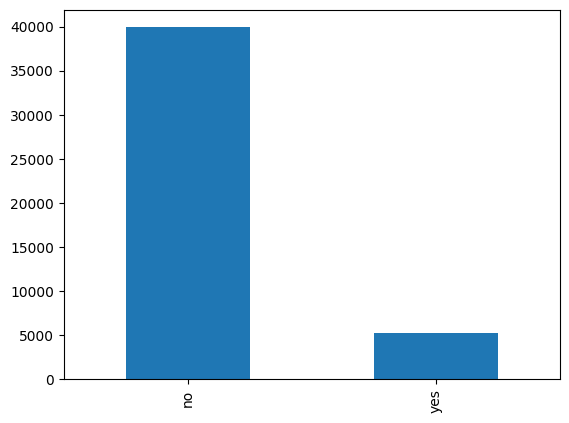

In [100]:
df.y.value_counts().plot.bar()

In [97]:
df.y.isnull().sum()

0

#**EDA**